# Benchmarking Exact Diagonalization for $\mathbb{Z}2$ models

We assess the computational time of the sparse algorithm. In particular, we focus on the Exact Diagonalization algorithm for a Z2 spin lattice model. The theory is a pure gauge theory.

To use this notebook do:
```pip install qs-mps```


In [1]:
from qs_mps.applications.Z2.exact_hamiltonian import H_Z2_gauss
import time
import numpy as np

## Vary the spin lattice size $l$ x $L$

In [41]:
ls = [2,3,4,5]
model = "Z2_dual"
h = 1
path = "/Users/fradm98/Library/CloudStorage/GoogleDrive-fra.di.marcantonio@gmail.com/My Drive/projects/1_Z2/results/exact/time_data"

time_tot = []
for l in ls:
    for L in range(l,ls[-1]+1):
        dof_direct = (2*l*L - l - L)
        print(f"computing guess for l={l}, L={L}")
        time_st = time.perf_counter()
        c = (1/np.sqrt(2))**dof_direct
        v0 = [c]*(2**dof_direct)
        v0 = np.array(v0, dtype=complex)
        time_end = abs(time.perf_counter() - time_st)
        print(f"Time of computation: {time_end} sec")
        print("==============================")
        print(f"start ED for l={l}, L={L}")
        time_st = time.perf_counter()
        lattice = H_Z2_gauss(l=l, L=L, model=model, lamb=h)
        lattice.diagonalize(v0=v0, save=False)

        time_end = abs(time.perf_counter() - time_st)
        print(f"Time of computation: {time_end} sec")
        print("==============================")
        print("==============================\n")
        time_tot.append(time_end)

np.savetxt(f"{path}/times_ed_l_[{ls[0]},{ls[0]}]_L_{ls[-1]},{ls[-1]}", time_tot)

computing guess for l=2, L=2
Time of computation: 5.399598740041256e-05 sec
start ED for l=2, L=2
Time of computation: 0.012109645991586149 sec

computing guess for l=2, L=3
Time of computation: 3.935600398108363e-05 sec
start ED for l=2, L=3
Time of computation: 0.017629979003686458 sec

computing guess for l=2, L=4
Time of computation: 0.00013641599798575044 sec
start ED for l=2, L=4
Time of computation: 0.03559081599814817 sec

computing guess for l=2, L=5
Time of computation: 0.0015239149797707796 sec
start ED for l=2, L=5
Time of computation: 0.1400676959892735 sec

computing guess for l=3, L=3
Time of computation: 0.0007714650128036737 sec
start ED for l=3, L=3
Time of computation: 0.09172688296530396 sec

computing guess for l=3, L=4
Time of computation: 0.024254438001662493 sec
start ED for l=3, L=4
Time of computation: 7.160888797021471 sec

computing guess for l=3, L=5
Time of computation: 0.579388438956812 sec
start ED for l=3, L=5
Time of computation: 261.4116315720021 sec


: 

Now you can plot the results and check which fit works better. First, we need to define the functions for fitting:

In [24]:
# load time
time_tot = np.loadtxt(f"{path}/times_ed_l_[{ls[0]},{ls[0]}]_L_{ls[-1]},{ls[-1]}")

# import function
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams["text.usetex"] = True # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

def exponential_function(x, a, b, c):
    """
    Exponential function: a * exp(b * x) + c
    """
    return a * np.exp(x * b) + c

def poly_function(x, a, b, c):
    """
    Poly function: a * x ** b + c
    """
    return a * x ** b + c

def linear_function(x, a, b):
    """
    Linear function: a * x + b
    """
    return a * x + b


def fit(x_data, y_data, ftype, guess=None):
    """
    Fit function to given data.
    
    Parameters:
    - x_data: Input data (independent variable)
    - y_data: Output data (dependent variable)
    - ftype: type of function we fit
    
    Returns:
    - Coefficients of the fitted function
    """
    # Use curve_fit to fit the data to the exponential function
    if ftype == "exp":
        params, covariance = curve_fit(exponential_function, x_data, y_data, guess)
    if ftype == "poly":
        params, covariance = curve_fit(poly_function, x_data, y_data, guess)
    if ftype == "lin":
        params, covariance = curve_fit(linear_function, x_data, y_data, guess)
    
    # Extract the coefficients
    err = np.sqrt(np.diag(covariance))
    return params, err

Now we fit and plot

In [36]:
lattice_dims = [f"{l-1}x{L-1}" for l in ls for L in range(l,ls[-1]+1)]
x_data = np.array(range(len(lattice_dims)))
y_data = time_tot
print(x_data, y_data)


[0 1 2 3 4 5 6 7 8 9] [1.27378360e-02 1.49148110e-02 3.26503640e-02 7.86222380e-02
 7.23538572e+00 1.46688450e+03]


In [35]:
ls = [2,3,4,5]
H_dims = [2**(2*l*L - l - L) for l in ls for L in range(l,ls[-1]+1)]
print(H_dims)

[16, 128, 1024, 8192, 4096, 131072, 4194304, 16777216, 2147483648, 1099511627776]


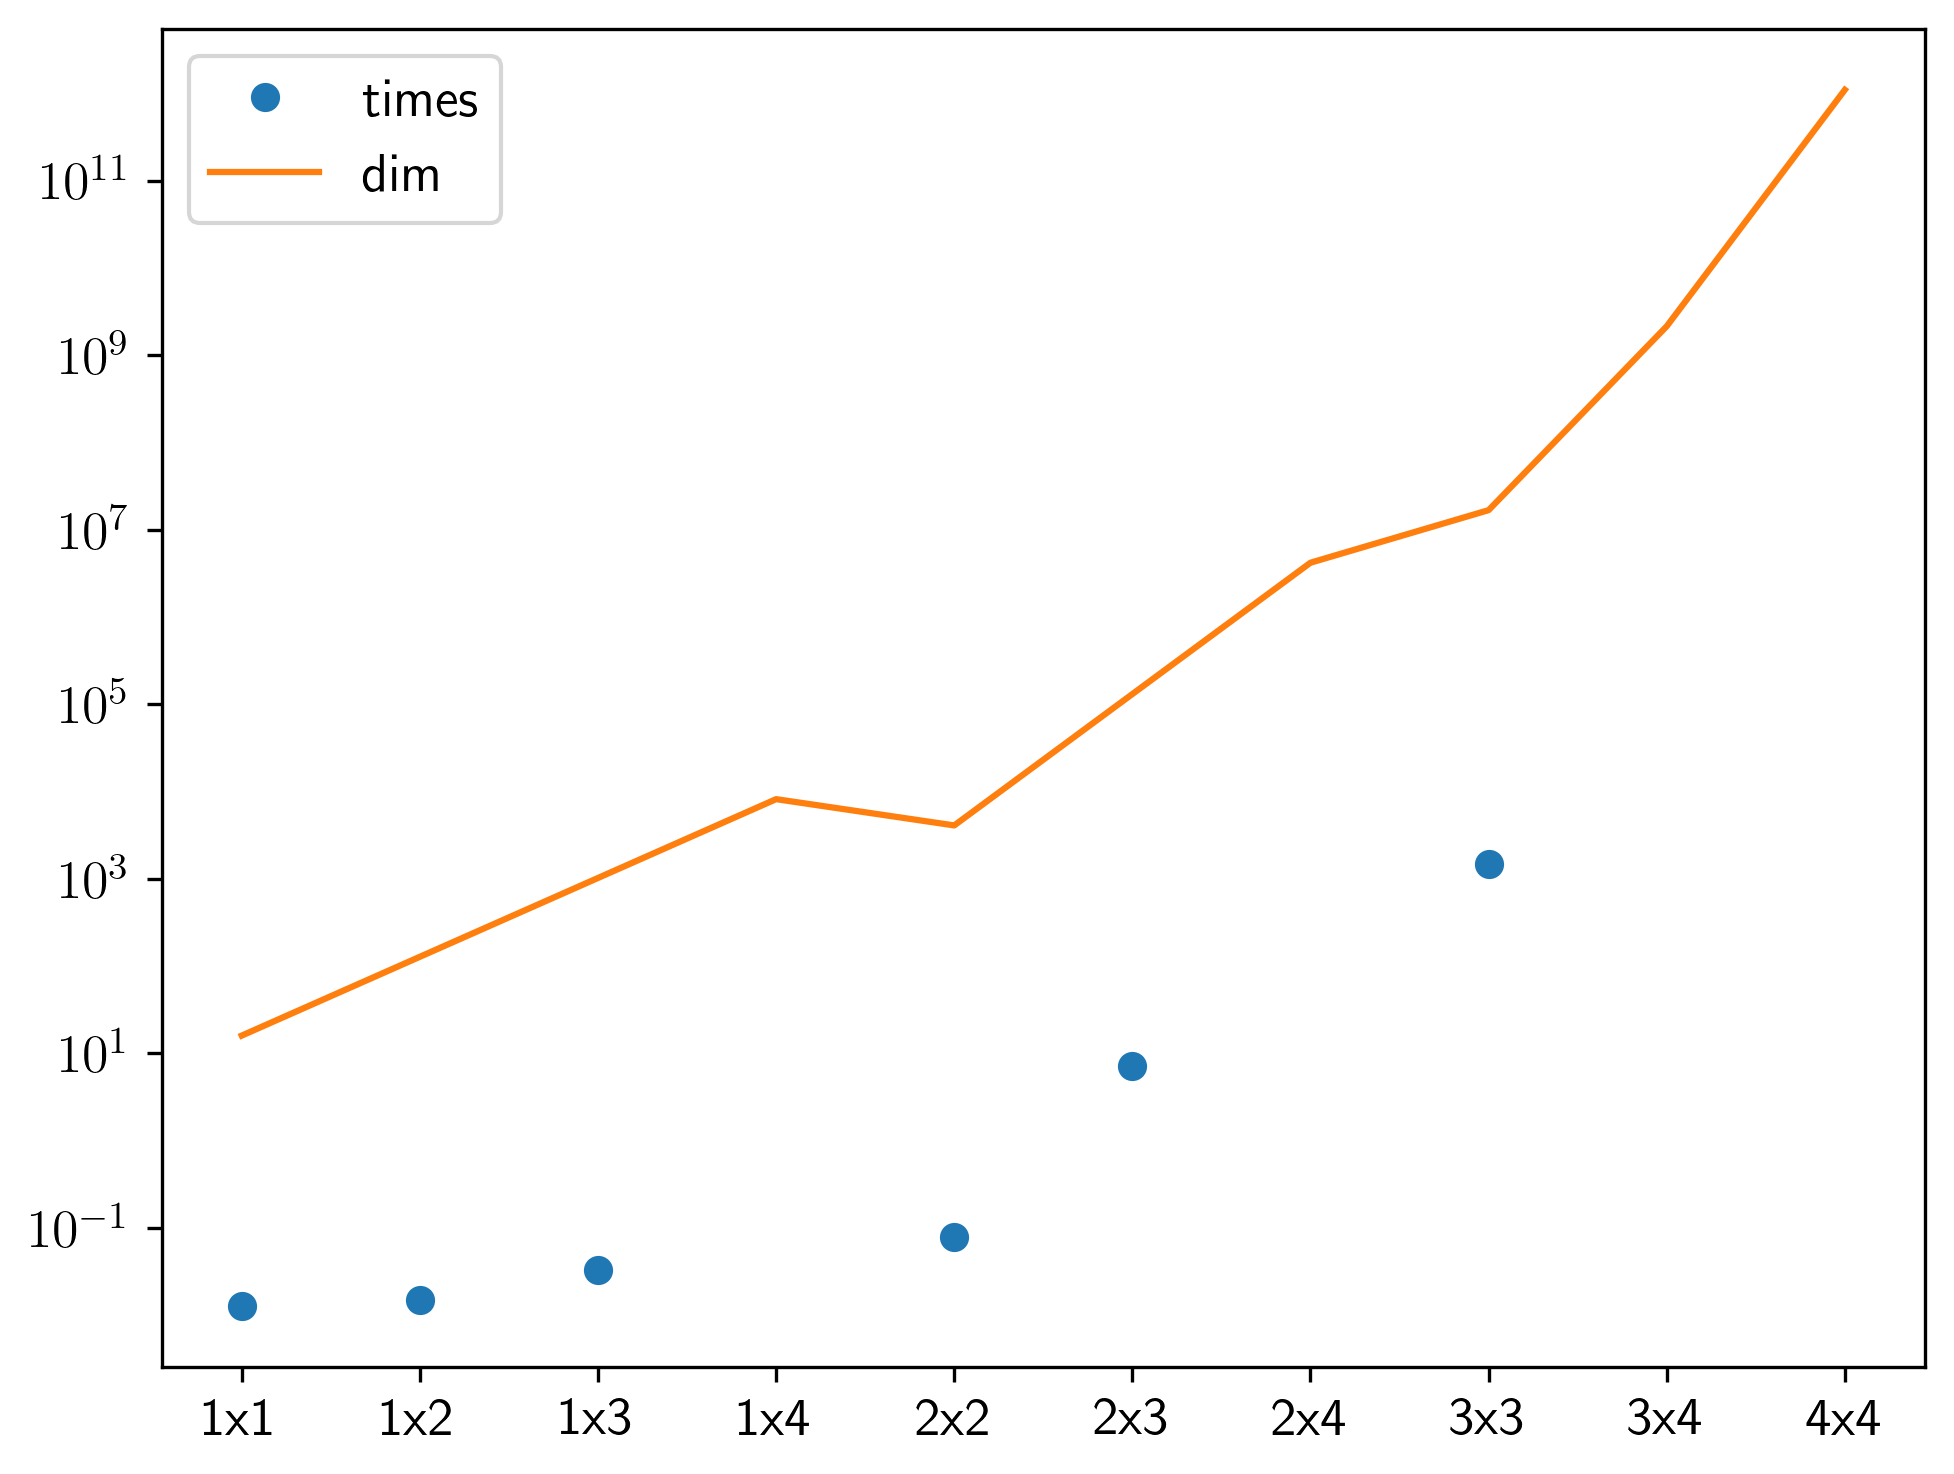

In [39]:
plt.plot([0,1,2,4,5,7], y_data, 'o', label="times")
plt.plot(x_data,H_dims, label="dim")
plt.yscale('log')
plt.xticks(ticks=x_data, labels=lattice_dims)
plt.legend()
plt.show()

In [25]:
lattice_dims = [f"{l}x{L}" for l in ls for L in range(l,ls[-1]+1)]
x_data = np.array(range(len(lattice_dims)))
# time_tot = np.array([3.23587389e+00,
#                     1.07527894e+01, 1.68719734e+02, 2.00160884e+03]) # 7.57573918e-02, 1.71739756e-01, 4.02117394e-01,
y_data = time_tot

# Fit the data to the exponential function
params_exp, err_exp = fit(x_data, y_data, 'exp')
params_poly, err_poly = fit(x_data, y_data, 'poly')

# Print the coefficients
print(f"Coefficients exp: {params_exp}")
print(f"Errors exp: {err_exp}")
print(f"Coefficients poly: {params_poly}")
print(f"Errors poly: {err_poly}")

# Plot the original data and the fitted curve
plt.title("ED Computational Time of $\mathbb{Z2}$ lattices at $h=h_c$")
plt.scatter(x_data, y_data, label='Original Data')
x_fit = np.linspace(min(x_data), max(x_data), 1000)
# y_fit_exp = exponential_function(x_fit, params_exp[0], params_exp[1], params_exp[2])
y_fit_poly = poly_function(x_fit, params_poly[0], params_poly[1], params_poly[2])
# plt.plot(x_fit, y_fit_exp, 'r-', label='Fitted Exponential Curve')
plt.plot(x_fit, y_fit_poly, 'g-', label='Fitted Polynomial Curve')
plt.fill_between(x_fit, poly_function(x_fit, params_poly[0]-err_poly[0], params_poly[1]-err_poly[1], params_poly[2]-err_poly[2]),
                 poly_function(x_fit, params_poly[0]+err_poly[0], params_poly[1]+err_poly[1], params_poly[2]+err_poly[2]), color='green', alpha=0.2, label='Error Bounds')
plt.yscale('log')
# plt.xscale('log')
plt.xticks(ticks=x_data, labels=lattice_dims)
plt.xlabel('bond dimension $(\chi)$')
plt.ylabel('time (t)')
y_last_plus = poly_function(x_fit[-1], params_poly[0]+err_poly[0], params_poly[1]+err_poly[1], params_poly[2]+err_poly[2])
print("last values")
print(y_fit_poly[-1])
print(y_last_plus)
y_err = abs(y_fit_poly[-1] - y_last_plus)

if y_fit_poly[-1] < 60:
    unit = 'sec(s)'
elif y_fit_poly[-1] > 60 and y_fit_poly[-1] < 3600:
    unit = 'min(s)'
    t = y_fit_poly[-1] / 60
    t_err = y_err / 60
elif y_fit_poly[-1] > 3600:
    unit = 'hour(s)'
    t = y_fit_poly[-1] / 3600
    t_err = y_err / 3600

# textstr = f'Expectation time for $\chi = 1024$ is {t:.2f} ± {t_err:.2f} {unit}'
# plt.text(0.05, 0.90, textstr, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# textstr = f'Fitted Parameters:\na = {params_poly[0]:.2e} ± {err_poly[0]:.2e}\nb = {params_poly[1]:.2f} ± {err_poly[1]:.2f}\nc = {params_poly[2]:.2f} ± {err_poly[2]:.2f}'
# plt.text(0.05, 0.80, textstr, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# textstr = f'Poly function:\n$a x^b + c$'
# plt.text(0.33, 0.80, textstr, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# plt.hlines(y=y_fit_poly[-1], xmin=x_data[0], xmax=x_data[-1], linestyles='dashed', colors='black', label='time $``=" \langle t \\rangle_{\chi=1024}$')
# plt.hlines(y=3600, xmin=x_data[0], xmax=x_data[-1], linestyles='dashed', colors='black', linewidth=0.8, label='one hour')
plt.legend(loc='lower right', fontsize=10)
# plt.savefig(f"times_dmrg_L_{L}_chis_16-32-64-128.png")
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

## Fix the the bond dimension $\chi$ and change spin chain size $L$

In [ ]:
# data
Ls = [20,30,40,50,60,70,80]
d = 2
model = "Ising"
chi = 64 #,8,16,32,64,128,256,512
h = 1
J = 1
eps = 0

time_tot = []
for L in Ls:
    print(f"start DMRG for L={L}, chi={chi}")
    time_st = time.perf_counter()
    chain = MPS(L=L, d=d, model=model, chi=chi, h=h, eps=eps, J=J)
    chain._random_state(seed=3, chi=chi)
    energy, entropy = chain.DMRG(trunc_chi=True, trunc_tol=False, n_sweeps=2)
    time_end = abs(time.perf_counter() - time_st)
    print(f"Time of computation: {time_end} sec")
    time_tot.append(time_end)

np.savetxt(f"{path}times_dmrg_chi_{chi}_Ls_20-30-40-50-60-70-80", time_tot)

In [ ]:
# load the data
time_tot = np.loadtxt(f"{path}times_dmrg_chi_{chi}_Ls_20-30-40-50-60-70-80")
x_data = Ls
y_data = time_tot

params_lin, err_lin = fit(x_data,y_data,'lin')

# Plot the original data and the fitted curve
plt.title(f"DMRG Computational Time for $\chi={chi}$ at $h=h_c$")
plt.scatter(x_data, y_data, label='Original Data')
x_fit = np.linspace(min(x_data), 1000, 1000)
y_fit_lin = linear_function(x_fit, params_lin[0], params_lin[1])
plt.plot(x_fit, y_fit_lin, 'g-', label='Fitted Linear Curve')
plt.fill_between(x_fit, linear_function(x_fit, params_lin[0]-err_lin[0], params_lin[1]-err_lin[1]),
                 linear_function(x_fit, params_lin[0]+err_lin[0], params_lin[1]+err_lin[1]), color='green', alpha=0.2, label='Error Bounds')
# plt.xscale('log')
plt.xticks(ticks=Ls+[1000], labels=Ls+[1000])
plt.xlabel('chain length $(L)$')
plt.ylabel('time (t)')
y_last_plus = linear_function(x_fit[-1], params_lin[0]+err_lin[0], params_lin[1]+err_lin[1])
print("last values")
print(y_fit_lin[-1])
print(y_last_plus)
y_err = abs(y_fit_lin[-1] - y_last_plus)

if y_fit_lin[-1] < 60:
    unit = 'sec(s)'
elif y_fit_lin[-1] > 60 and y_fit_lin[-1] < 3600:
    unit = 'min(s)'
    t = y_fit_lin[-1] / 60
    t_err = y_err / 60
elif y_fit_lin[-1] > 3600:
    unit = 'hour(s)'
    t = y_fit_lin[-1] / 3600
    t_err = y_err / 3600

textstr = f'Expectation time for $L = 1000$ is {t:.2f} ± {t_err:.2f} {unit}'
plt.text(0.05, 0.90, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
textstr = f'Fitted Parameters:\na = {params_lin[0]:.2e} ± {err_lin[0]:.2e}\nb = {params_lin[1]:.2f} ± {err_lin[1]:.2f}'
plt.text(0.05, 0.80, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
textstr = f'lin function:\n$a x + b$'
plt.text(0.35, 0.80, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.hlines(y=y_fit_lin[-1], xmin=chis[0], xmax=1024, linestyles='dashed', colors='black', label='time $``=" \langle t \\rangle_{L=1000}$')
plt.hlines(y=3600, xmin=chis[0], xmax=1024, linestyles='dashed', colors='black', linewidth=0.8, label='one hour')
plt.legend(loc='lower right', fontsize=10)
plt.savefig(f"times_dmrg_L_20-30-40-50-60-70-80_chi_{chi}.png")
plt.show()